Insurance Claim Fraud Detection

Insurance Claim Fraud Detection

Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to the year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported

Dataset Link-  https://raw.githubusercontent.com/FlipRoboTechnologies/ML_Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score,roc_auc_score, roc_curve, auc

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings ("ignore")

In [2]:
#Load dataset
link="https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
header = ['No_Month', 'Age','policy_no', 'policy_bind_date', 'policy_state', 'csl', 'dedct', 'premiun', 'umbella_limit', 'zip', 'sex','edu_level','occupation', 'hobbie', 'relationship','C_gain', 'C_loss', 'incident_date','incient_type','collision_type','severity','authority_contcd', 'incident_state', 'incident_city', 'location','incident_hour', 'no_vehicle_involved','prop_damage','injuries','witnesses','police_report','Tclaim_amount','injury_claim','prop_claim','veh_claim','auto_make','auto_model', 'auto_year','fraud_reported']
df_claim=pd.read_csv(link,names=header)

In [3]:
df_claim

,No_Month,Age,policy_no,policy_bind_date,policy_state,csl,dedct,premiun,umbella_limit,zip,...,witnesses,police_report,Tclaim_amount,injury_claim,prop_claim,veh_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Observation:

This dataset contain the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. the datas are numerical and categorical datas. There are 1000 samples in the dataset with 39 columns of which 1 of is target variable ('fraud_reported').

In [4]:
#Columns present in the dataset 
df_claim.columns

Index(['No_Month', 'Age', 'policy_no', 'policy_bind_date', 'policy_state',
       'csl', 'dedct', 'premiun', 'umbella_limit', 'zip', 'sex', 'edu_level',
       'occupation', 'hobbie', 'relationship', 'C_gain', 'C_loss',
       'incident_date', 'incient_type', 'collision_type', 'severity',
       'authority_contcd', 'incident_state', 'incident_city', 'location',
       'incident_hour', 'no_vehicle_involved', 'prop_damage', 'injuries',
       'witnesses', 'police_report', 'Tclaim_amount', 'injury_claim',
       'prop_claim', 'veh_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [5]:
#shape of the Data
df_claim.shape

(1000, 39)

Data Preprocessing

In [6]:
# Checking the column information
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No_Month             1000 non-null   int64  
 1   Age                  1000 non-null   int64  
 2   policy_no            1000 non-null   int64  
 3   policy_bind_date     1000 non-null   object 
 4   policy_state         1000 non-null   object 
 5   csl                  1000 non-null   object 
 6   dedct                1000 non-null   int64  
 7   premiun              1000 non-null   float64
 8   umbella_limit        1000 non-null   int64  
 9   zip                  1000 non-null   int64  
 10  sex                  1000 non-null   object 
 11  edu_level            1000 non-null   object 
 12  occupation           1000 non-null   object 
 13  hobbie               1000 non-null   object 
 14  relationship         1000 non-null   object 
 15  C_gain               1000 non-null   in

Observation:

The columns have 3 different data types made up of 21 objects dtypes, 17 integers dtypes and 1 floats Dtypes.

No missing information.

In [7]:
# Check for missing values
df_claim.isnull().sum()

No_Month               0
Age                    0
policy_no              0
policy_bind_date       0
policy_state           0
csl                    0
dedct                  0
premiun                0
umbella_limit          0
zip                    0
sex                    0
edu_level              0
occupation             0
hobbie                 0
relationship           0
C_gain                 0
C_loss                 0
incident_date          0
incient_type           0
collision_type         0
severity               0
authority_contcd       0
incident_state         0
incident_city          0
location               0
incident_hour          0
no_vehicle_involved    0
prop_damage            0
injuries               0
witnesses              0
police_report          0
Tclaim_amount          0
injury_claim           0
prop_claim             0
veh_claim              0
auto_make              0
auto_model             0
auto_year              0
fraud_reported         0
dtype: int64

There are no Null values in the dataset

In [8]:
#Unique values in each of the colums

df_claim.nunique().to_frame("Unique Values")

,Unique Values
No_Month,391
Age,46
policy_no,1000
policy_bind_date,951
policy_state,3
csl,3
dedct,3
premiun,991
umbella_limit,11
zip,995


The dataset shows that 'fraud_reported' column with 2 unique values

Data Analysis and Visualization:

N    753
Y    247
Name: fraud_reported, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

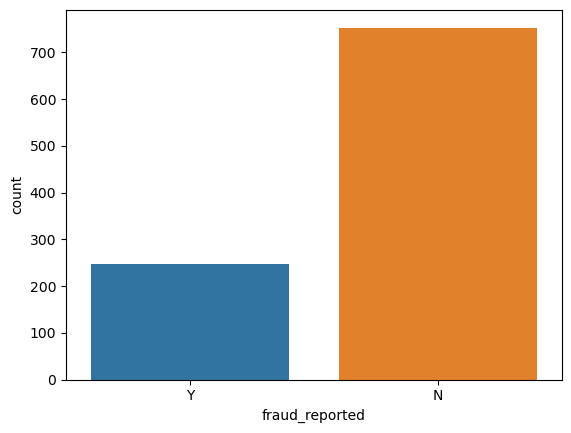

In [9]:
#Counts by Type of glass
print(df_claim['fraud_reported'].value_counts())
sns.countplot(x ='fraud_reported', data=df_claim)

Observation:

The figure shows that there were 247 fraudulent request claimed and 753 of the data are non-fraudulent request.

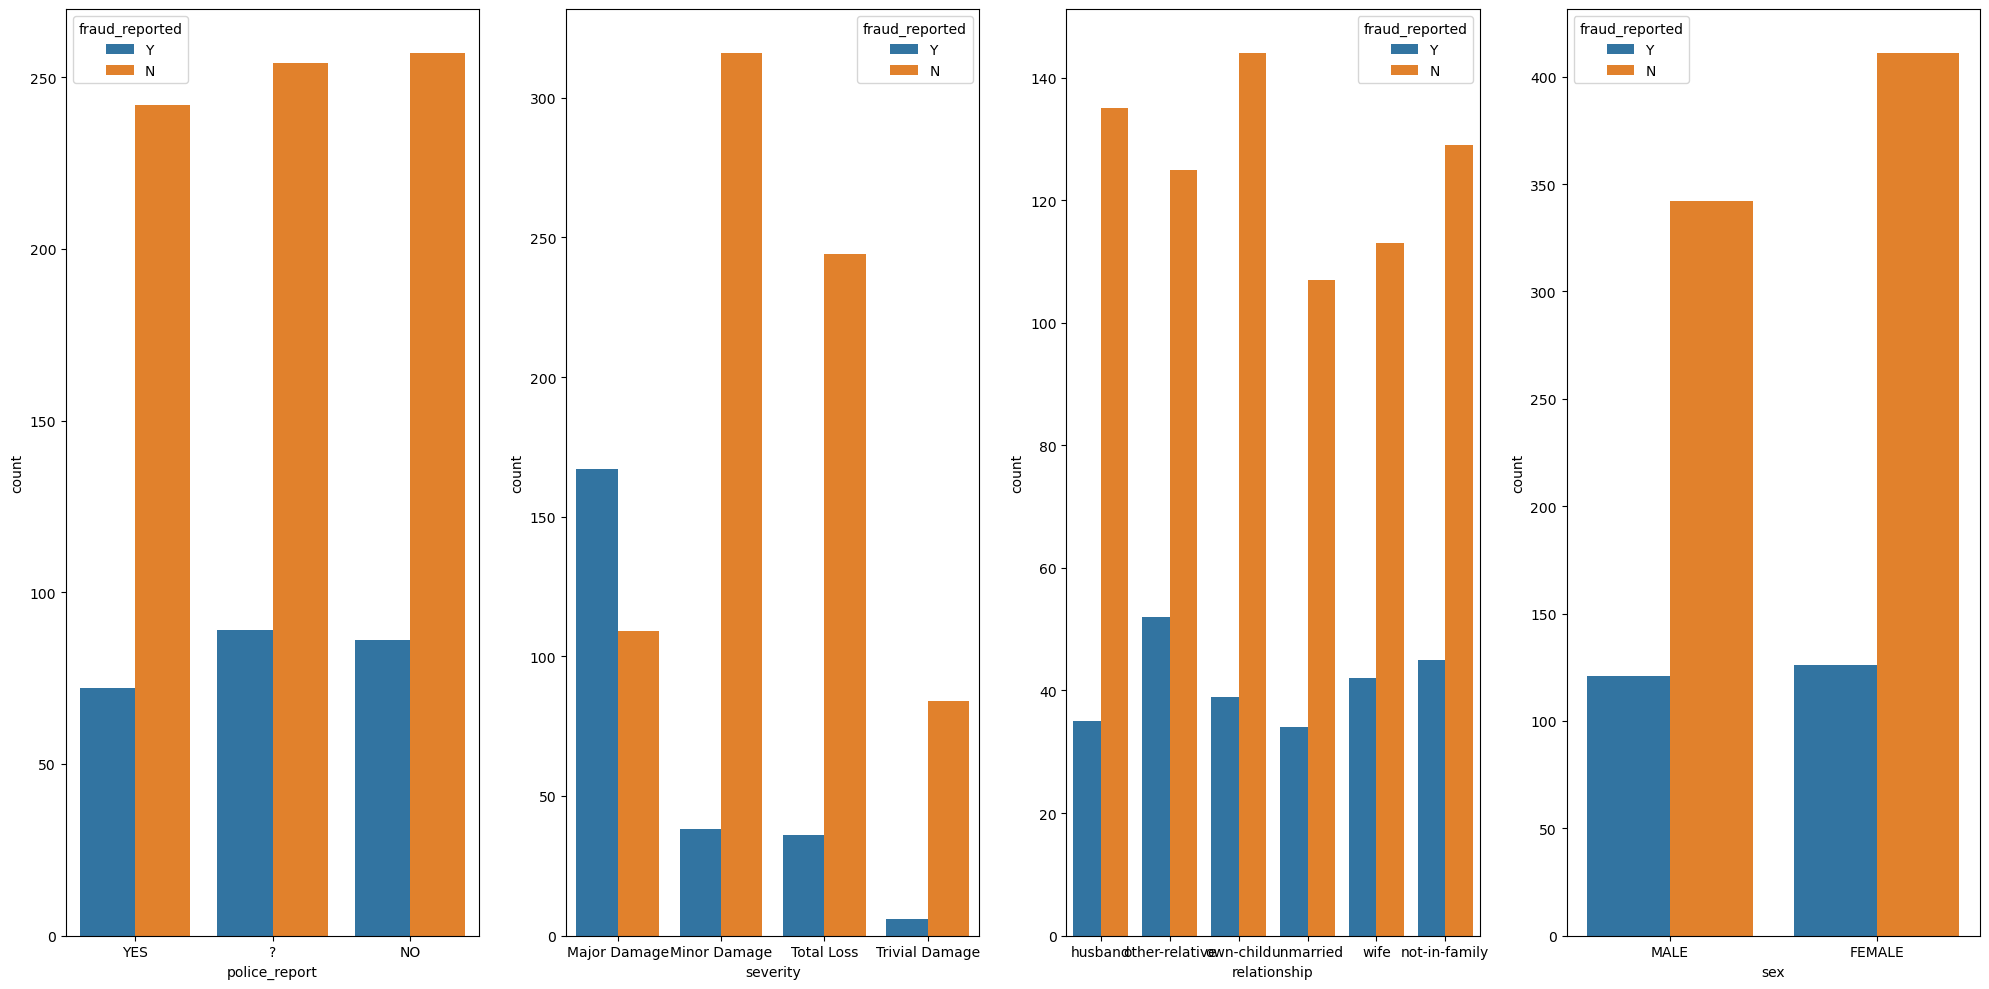

In [10]:
#Income Distribution 
plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(['police_report', 'severity','relationship','sex']): 
    plt.subplot(1,4, i+1) 
    sns.countplot(data=df_claim, x=col, hue='fraud_reported')
plt.tight_layout() 
plt.show() 

The diagram shows the fraud_reported based on police_report', 'severity','relationship','sex.

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df_claim.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_claim[col] = label_encoder.fit_transform(df_claim[col])


In [12]:
df_claim

,No_Month,Age,policy_no,policy_bind_date,policy_state,csl,dedct,premiun,umbella_limit,zip,...,witnesses,police_report,Tclaim_amount,injury_claim,prop_claim,veh_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


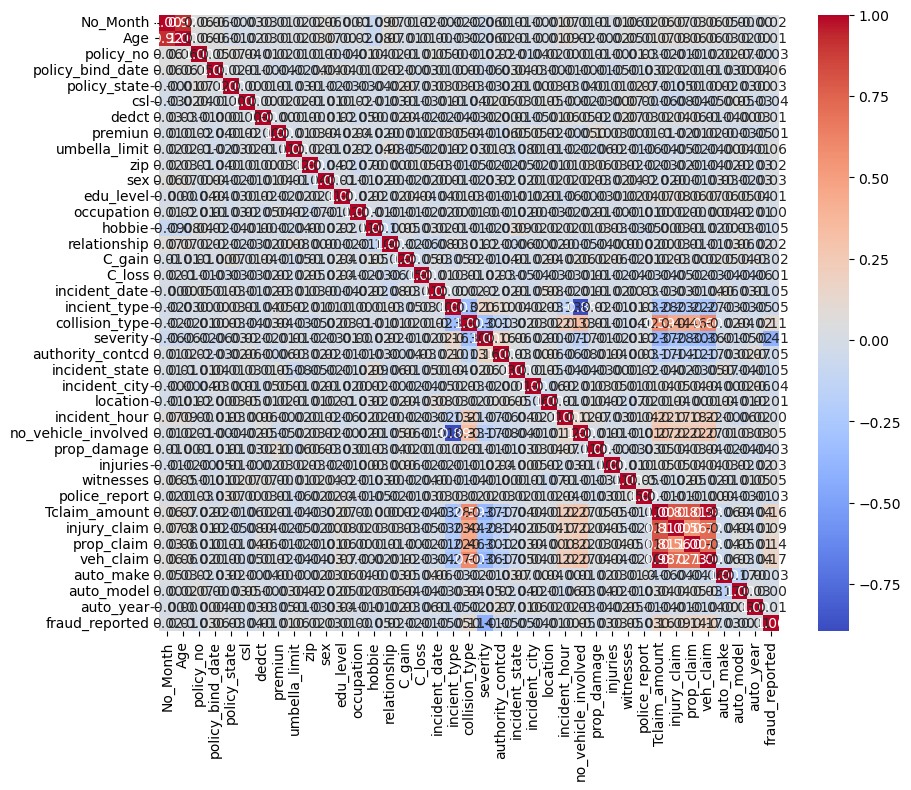

In [13]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_claim.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [14]:
#Statistical interpretation of the Dataset
df_claim.describe()

,No_Month,Age,policy_no,policy_bind_date,policy_state,csl,dedct,premiun,umbella_limit,zip,...,witnesses,police_report,Tclaim_amount,injury_claim,prop_claim,veh_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [15]:
cor_claim =df_claim.corr()
cor_claim

,No_Month,Age,policy_no,policy_bind_date,policy_state,csl,dedct,premiun,umbella_limit,zip,...,witnesses,police_report,Tclaim_amount,injury_claim,prop_claim,veh_claim,auto_make,auto_model,auto_year,fraud_reported
No_Month,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
Age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_no,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
dedct,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
premiun,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


In [16]:
cor_claim['fraud_reported'].sort_values(ascending=False)

fraud_reported         1.000000
veh_claim              0.170049
Tclaim_amount          0.163651
prop_claim             0.137835
collision_type         0.110130
injury_claim           0.090975
policy_bind_date       0.060642
umbella_limit          0.058622
no_vehicle_involved    0.051839
witnesses              0.049497
injuries               0.033877
sex                    0.030873
policy_state           0.029432
relationship           0.021043
No_Month               0.020544
zip                    0.019368
dedct                  0.014817
Age                    0.012143
edu_level              0.008808
auto_year              0.007928
incident_hour          0.004316
occupation             0.001564
auto_model             0.000720
location              -0.008832
premiun               -0.014480
C_loss                -0.014863
C_gain                -0.019173
auto_make             -0.027519
police_report         -0.028159
policy_no             -0.029443
prop_damage           -0.030497
csl     

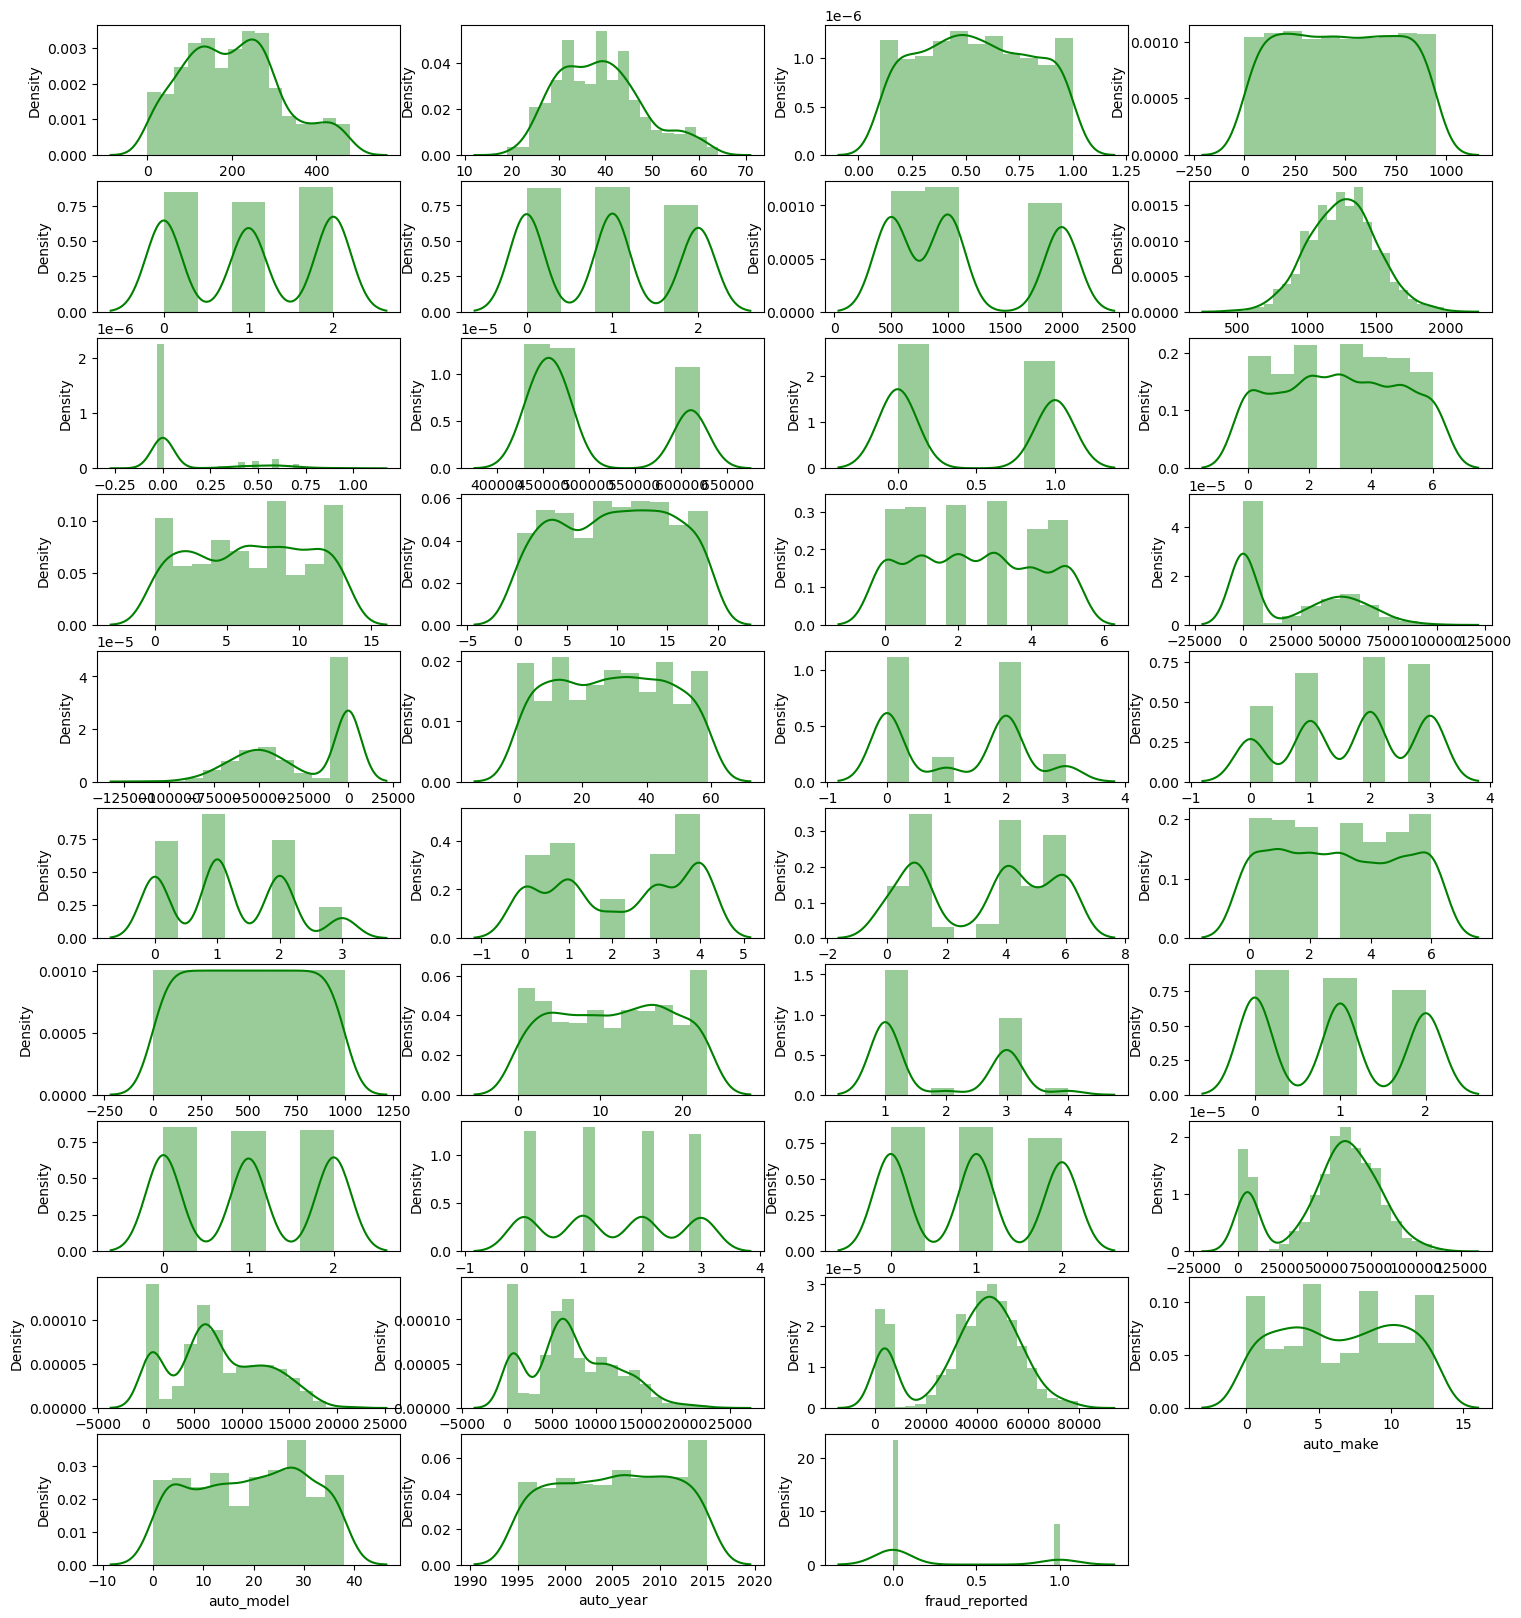

In [17]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(df_claim.select_dtypes(exclude=['object']).columns):
    plt.subplot(10,4,i[0]+1)
    sns.distplot(df_claim[i[1]],color='g')

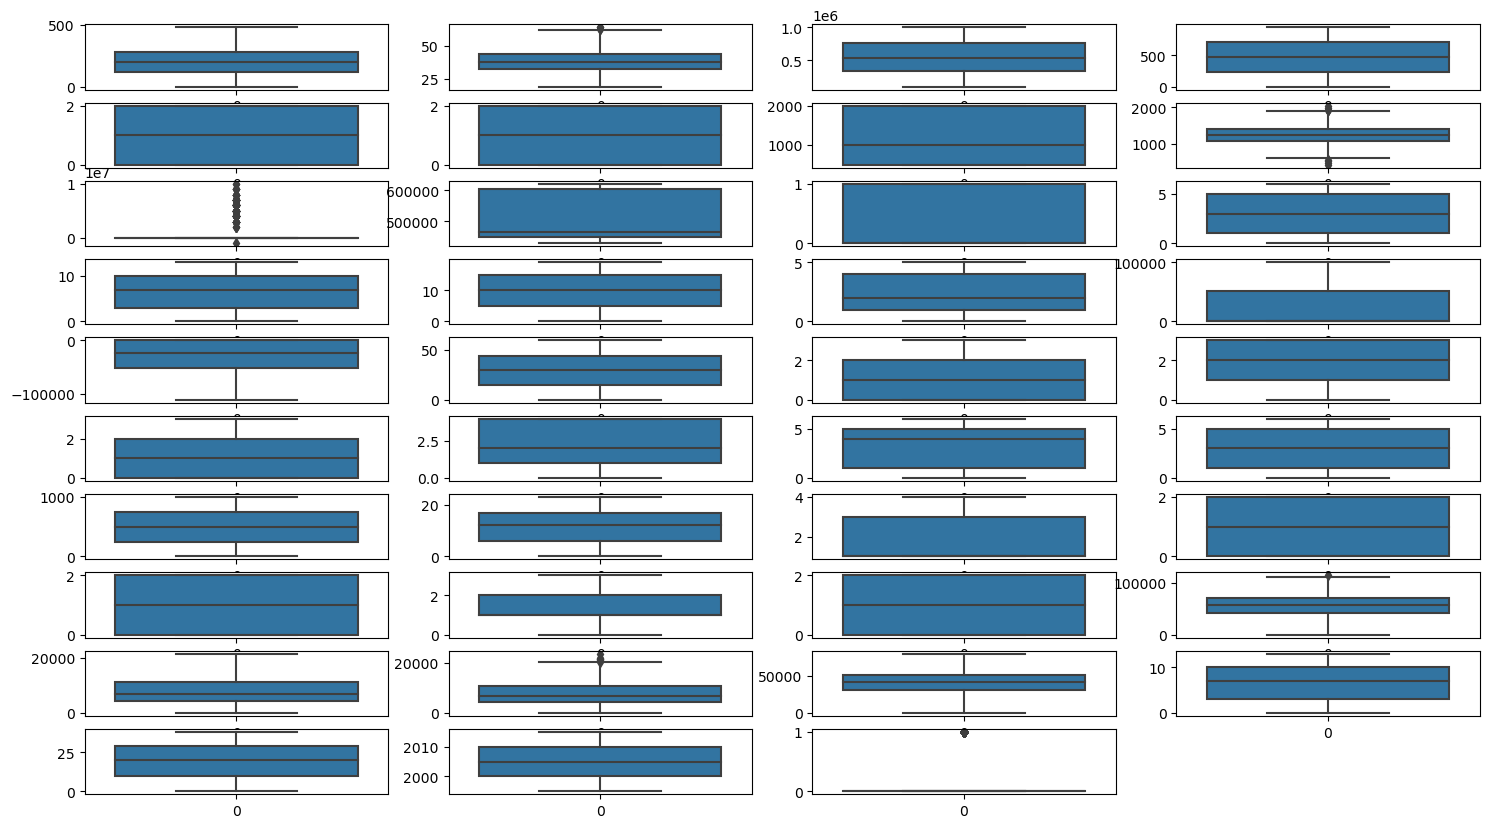

In [18]:
# Draw boxplot for each column to check Outliers              
plt.figure(figsize=(18,10))
for i in enumerate(df_claim.select_dtypes(exclude=['object']).columns):
    plt.subplot(10,4,i[0]+1)
    sns.boxplot(df_claim[i[1]])

In [19]:
#Removing Outlier
from scipy.stats import zscore

z=np.abs(zscore(df_claim[['No_Month', 'Age', 'policy_no', 'policy_bind_date', 'policy_state',
       'csl', 'dedct', 'premiun', 'umbella_limit', 'zip', 'sex', 'edu_level',
       'occupation', 'hobbie', 'relationship', 'C_gain', 'C_loss',
       'incident_date', 'incient_type', 'collision_type', 'severity',
       'authority_contcd', 'incident_state', 'incident_city', 'location',
       'incident_hour', 'no_vehicle_involved', 'prop_damage', 'injuries',
       'witnesses', 'police_report', 'Tclaim_amount', 'injury_claim',
       'prop_claim', 'veh_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported']]))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [20]:
# Checking the shape of the dataset after outliers have been remove and reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(df_claim[['No_Month', 'Age', 'policy_no', 'policy_bind_date', 'policy_state',
       'csl', 'dedct', 'premiun', 'umbella_limit', 'zip', 'sex', 'edu_level',
       'occupation', 'hobbie', 'relationship', 'C_gain', 'C_loss',
       'incident_date', 'incient_type', 'collision_type', 'severity',
       'authority_contcd', 'incident_state', 'incident_city', 'location',
       'incident_hour', 'no_vehicle_involved', 'prop_damage', 'injuries',
       'witnesses', 'police_report', 'Tclaim_amount', 'injury_claim',
       'prop_claim', 'veh_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported']]))
threshold = 3
df1 = df_claim[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_claim.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_claim.shape[0]-df1.shape[0])/df_claim.shape[0]*100)

df_claim=df1.copy() 

Shape of the dataframe before removing outliers:  (1000, 39)
Shape of the dataframe after removing outliers:  (980, 39)
Percentage of data loss post outlier removal:  2.0


Model Building

In [21]:
# Define the feature set and target variable
x = df_claim.drop(columns=['fraud_reported'])
y = df_claim['fraud_reported']

In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# Standardize the feature set
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = classifier.predict(x_test)

In [26]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 71.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       145
           1       0.42      0.22      0.29        51

    accuracy                           0.72       196
   macro avg       0.59      0.56      0.56       196
weighted avg       0.68      0.72      0.68       196



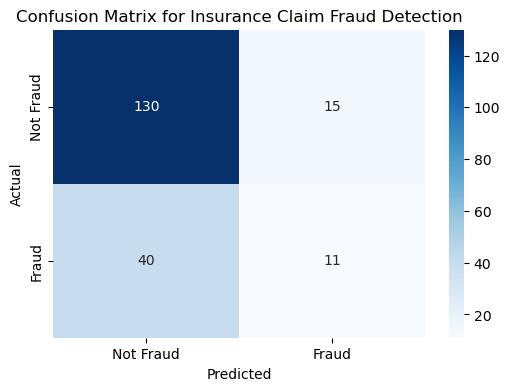

In [27]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Insurance Claim Fraud Detection')
plt.show()